In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dermatology_database.csv')

In [3]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.shape

(366, 35)

In [5]:
df['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [7]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [8]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [9]:
df['age'] = df['age'].replace('?', np.nan) 

In [10]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class


In [11]:
df['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [12]:
df.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

In [13]:
df['age'] = df['age'].astype(float)
df.dtypes

erythema                                 int64
scaling                                  int64
definite_borders                         int64
itching                                  int64
koebner_phenomenon                       int64
polygonal_papules                        int64
follicular_papules                       int64
oral_mucosal_involvement                 int64
knee_and_elbow_involvement               int64
scalp_involvement                        int64
family_history                           int64
melanin_incontinence                     int64
eosinophils_infiltrate                   int64
PNL_infiltrate                           int64
fibrosis_papillary_dermis                int64
exocytosis                               int64
acanthosis                               int64
hyperkeratosis                           int64
parakeratosis                            int64
clubbing_rete_ridges                     int64
elongation_rete_ridges                   int64
thinning_supr

In [14]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'erythema':
[2 3 1 0]

Unique values in column 'scaling':
[2 3 1 0]

Unique values in column 'definite_borders':
[0 3 2 1]

Unique values in column 'itching':
[3 2 0 1]

Unique values in column 'koebner_phenomenon':
[0 1 2 3]

Unique values in column 'polygonal_papules':
[0 3 2 1]

Unique values in column 'follicular_papules':
[0 3 1 2]

Unique values in column 'oral_mucosal_involvement':
[0 3 2 1]

Unique values in column 'knee_and_elbow_involvement':
[1 0 3 2]

Unique values in column 'scalp_involvement':
[0 1 2 3]

Unique values in column 'family_history':
[0 1]

Unique values in column 'melanin_incontinence':
[0 1 2 3]

Unique values in column 'eosinophils_infiltrate':
[0 2 1]

Unique values in column 'PNL_infiltrate':
[0 1 3 2]

Unique values in column 'fibrosis_papillary_dermis':
[0 3 1 2]

Unique values in column 'exocytosis':
[3 1 0 2]

Unique values in column 'acanthosis':
[2 3 1 0]

Unique values in column 'hyperkeratosis':
[0 2 1 3]

Unique values in 

In [15]:
columns_to_exclude = ['age', 'family_history','class','eosinophils_infiltrate']
columns_to_convert = [col for col in df.columns if col not in columns_to_exclude]

# Iterate over the columns and convert them to categorical
for col in columns_to_convert:
    df[col] = pd.Categorical(df[col], categories=[0, 1, 2, 3], ordered=True)

In [16]:
df['family_history'] = pd.Categorical(df['family_history'], categories=[0, 1])
df['eosinophils_infiltrate'] = pd.Categorical(df['eosinophils_infiltrate'], categories=[0,1,2], ordered=True)
df['class'] = pd.Categorical(df['class'], categories=[1,2,3,4,5,6])

In [17]:
# Get a list of column names to exclude 'age'
columns_to_convert = df.columns[df.columns != 'age']

# Convert the columns to categorical data type
df[columns_to_convert] = df[columns_to_convert].astype('category')
df.dtypes

erythema                               category
scaling                                category
definite_borders                       category
itching                                category
koebner_phenomenon                     category
polygonal_papules                      category
follicular_papules                     category
oral_mucosal_involvement               category
knee_and_elbow_involvement             category
scalp_involvement                      category
family_history                         category
melanin_incontinence                   category
eosinophils_infiltrate                 category
PNL_infiltrate                         category
fibrosis_papillary_dermis              category
exocytosis                             category
acanthosis                             category
hyperkeratosis                         category
parakeratosis                          category
clubbing_rete_ridges                   category
elongation_rete_ridges                 c

## Removing the outlier observation 

In [18]:
df = df[~((df['class'] == 2) & (df['koebner_phenomenon'] == 2))]

In [19]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", trainset.shape)
print("Test set shape:",testset.shape)

Training set shape: (292, 35)
Test set shape: (73, 35)


In [20]:
trainset.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

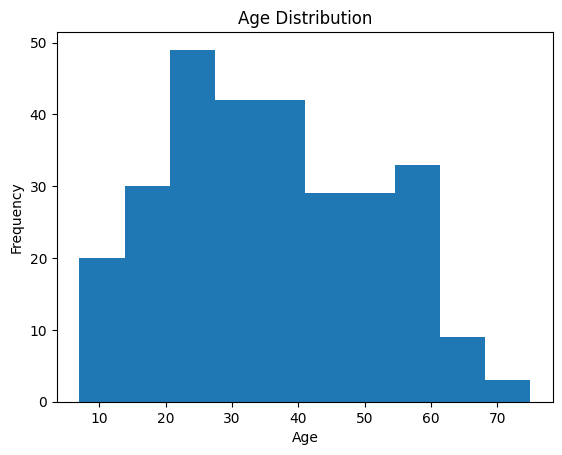

In [21]:
# Plot a histogram of the 'age' column
plt.hist(trainset['age'].dropna(), bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [22]:
#Imputing NAs in age with mean
age_mean = trainset['age'].mean()

# Impute the mean to the NaN values in the 'age' column
trainset['age'].fillna(age_mean, inplace=True)
testset['age'].fillna(age_mean, inplace=True)

In [23]:
trainset.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [24]:
testset.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [25]:
X_train = trainset.drop(columns=['class'])
y_train = trainset['class']
X_test = testset.drop(columns=['class'])
y_test = testset['class']

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled['age'] = scaler.fit_transform(X_train_scaled[['age']])
X_test_scaled = X_test.copy()
X_test_scaled['age'] = scaler.fit_transform(X_test_scaled[['age']])

In [27]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import joblib

random_state = 42
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Logistic Ridge', LogisticRegression(penalty='l2', max_iter=1000)),
    ('Logistic Lasso', LogisticRegression(penalty='l1',solver='liblinear')),
    ('KNN', KNeighborsClassifier()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier())
]

# Dictionary to store the results
results = {}
classification_reports = {}
trained_models = {}
# Iterate over classifiers and calculate metrics
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    trained_models[name] = clf 
    y_pred = clf.predict(X_train_scaled)
    classification_report_text = classification_report(y_train, y_pred)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='micro')
    precision = precision_score(y_train, y_pred, average='micro')
    recall = recall_score(y_train, y_pred, average='micro')
    
    classification_reports[name] = classification_report_text
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

for name, report in classification_reports.items():
    print(f"Classification Report for {name}:\n{report}")
    
for name, model in trained_models.items():
    filename = f"{name}_model.joblib"
    joblib.dump(model, filename)

           Logistic Regression  Logistic Ridge  Logistic Lasso       KNN  \
Accuracy                   1.0             1.0        0.989726  0.972603   
F1-Score                   1.0             1.0        0.989726  0.972603   
Precision                  1.0             1.0        0.989726  0.972603   
Recall                     1.0             1.0        0.989726  0.972603   

           Multinomial Naive Bayes  Random Forest  
Accuracy                  0.986301            1.0  
F1-Score                  0.986301            1.0  
Precision                 0.986301            1.0  
Recall                    0.986301            1.0  
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.

In [28]:
results = {}

for name, clf in trained_models.items():
    y_pred = clf.predict(X_test_scaled) 
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

results_df = pd.DataFrame(results)
print(results_df)

           Logistic Regression  Logistic Ridge  Logistic Lasso       KNN  \
Accuracy              0.986301        0.986301        0.986301  0.986301   
F1-Score              0.986301        0.986301        0.986301  0.986301   
Precision             0.986301        0.986301        0.986301  0.986301   
Recall                0.986301        0.986301        0.986301  0.986301   

           Multinomial Naive Bayes  Random Forest  
Accuracy                  0.986301            1.0  
F1-Score                  0.986301            1.0  
Precision                 0.986301            1.0  
Recall                    0.986301            1.0  


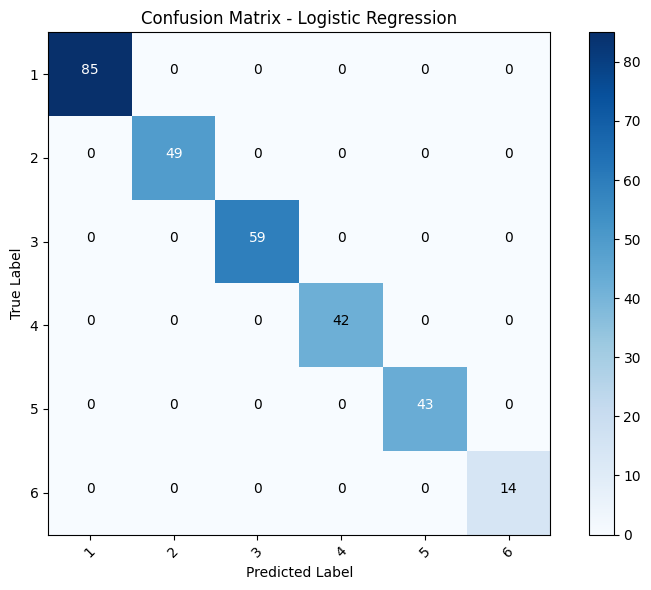

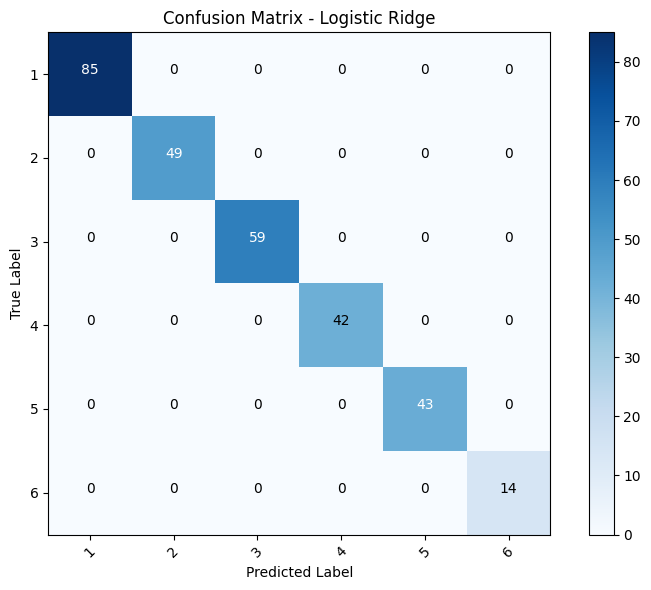

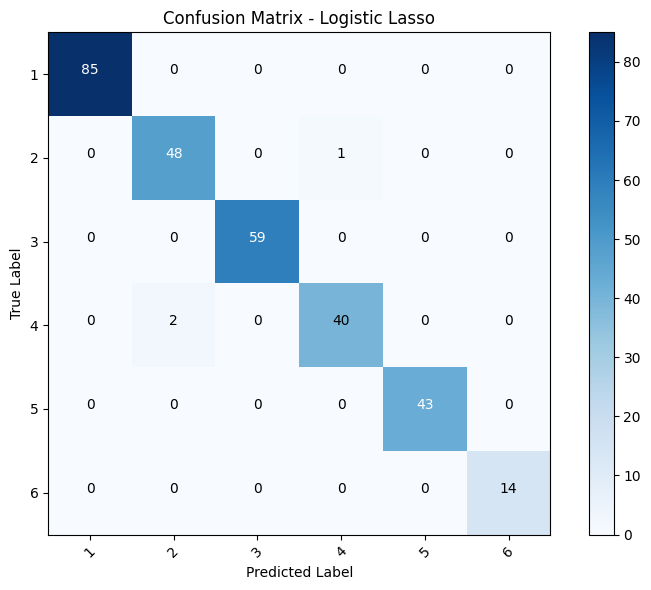

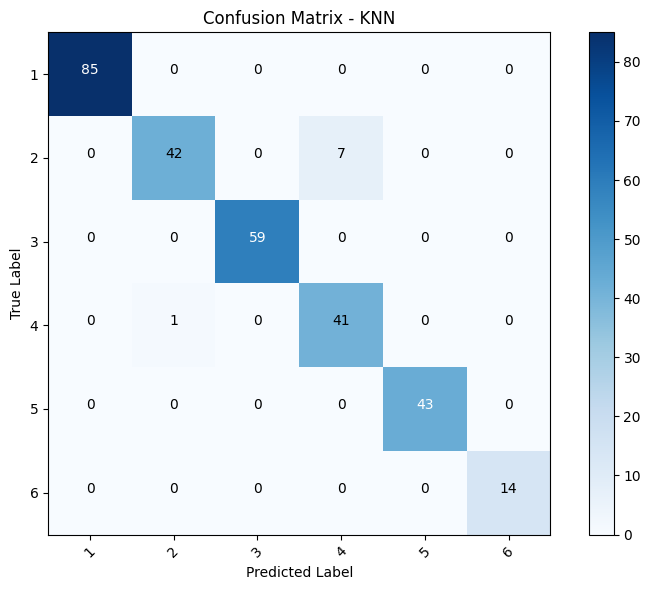

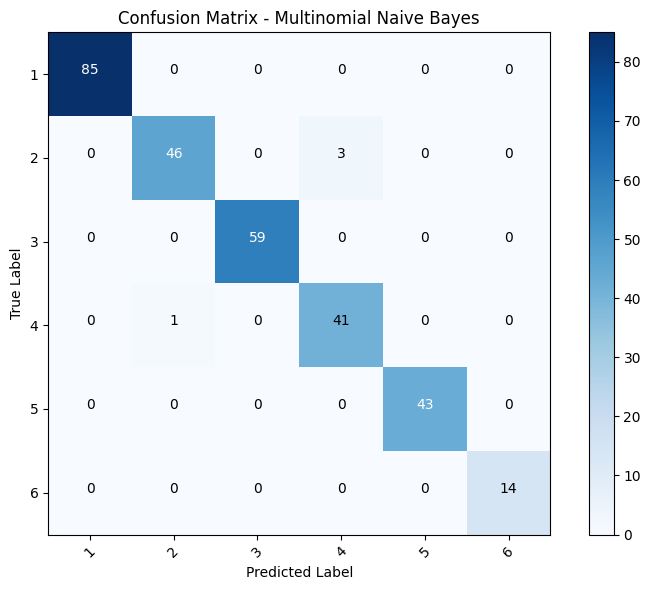

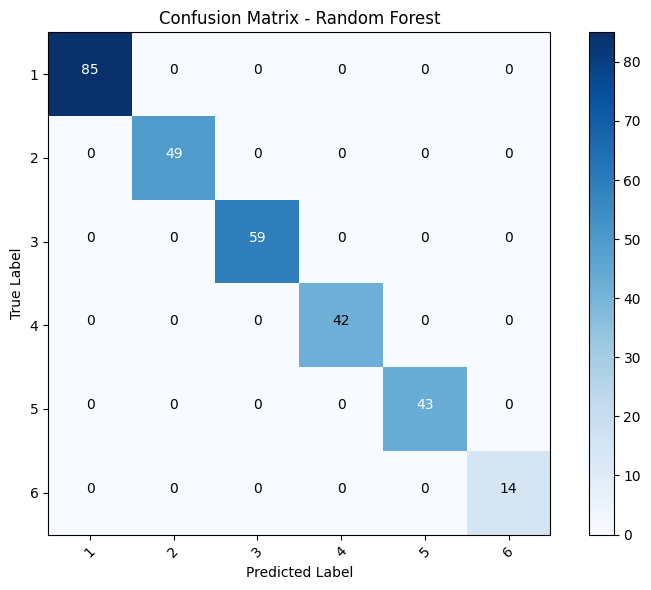

In [29]:
from sklearn.metrics import confusion_matrix
classes = ['1', '2', '3', '4', '5', '6']

confusion_matrices = {}

for name, clf in trained_models.items():
    y_pred = clf.predict(X_train_scaled)
    
    cm = confusion_matrix(y_train, y_pred)
    confusion_matrices[name] = cm

for name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

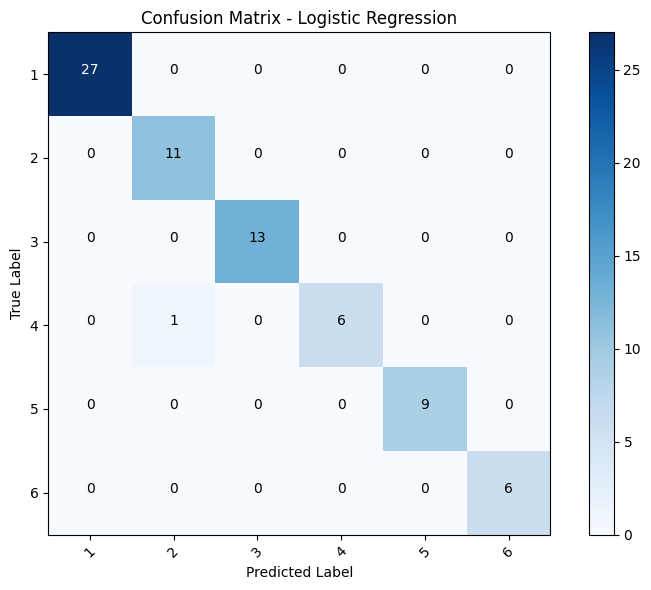

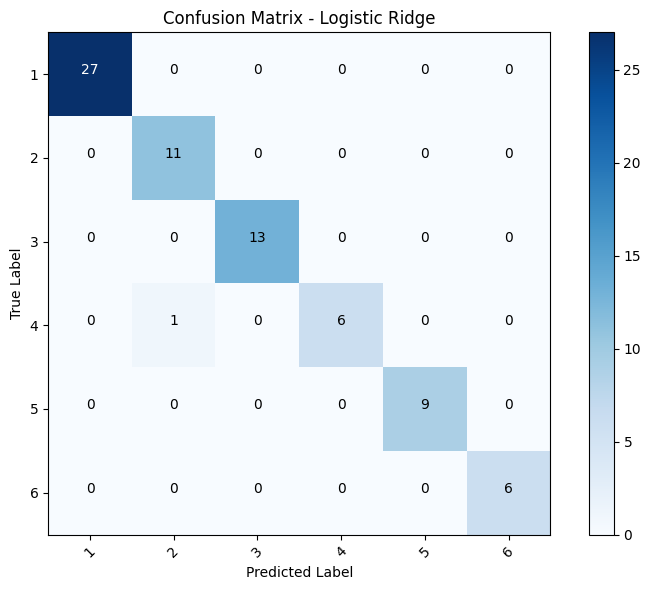

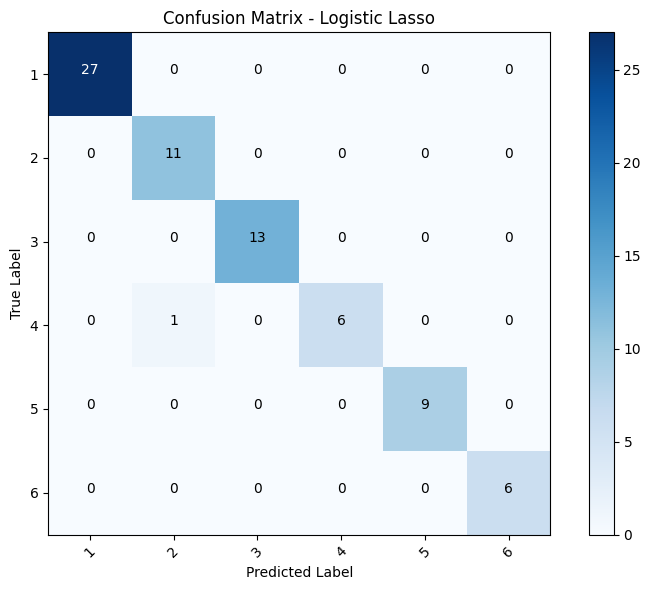

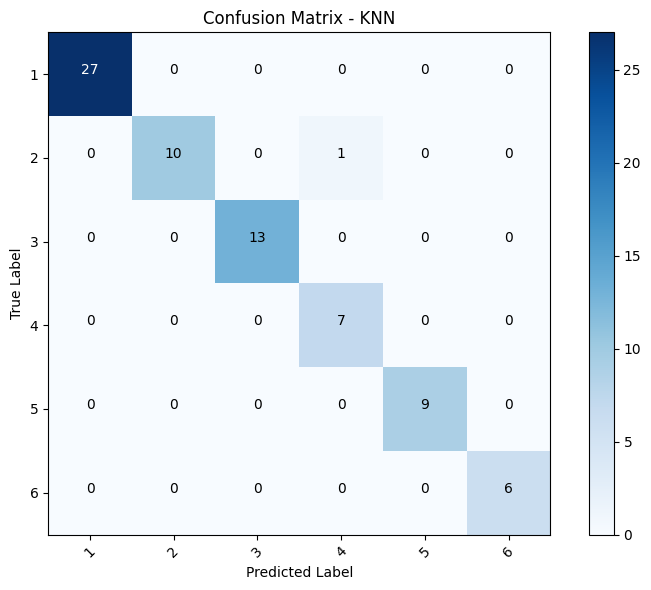

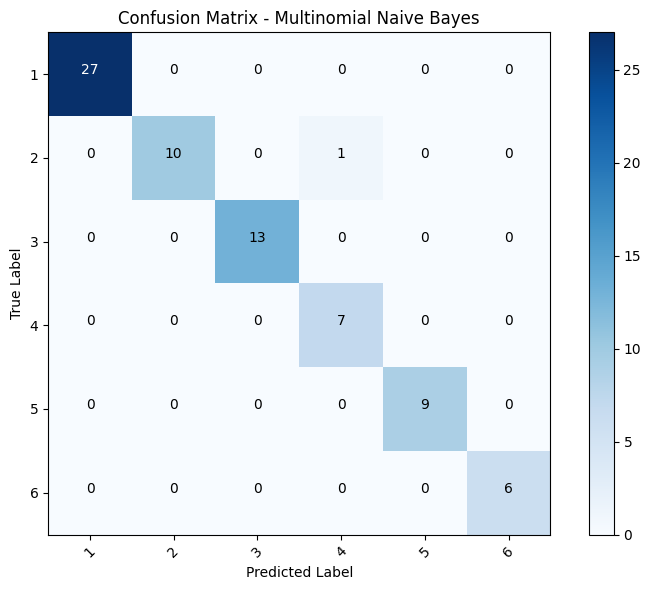

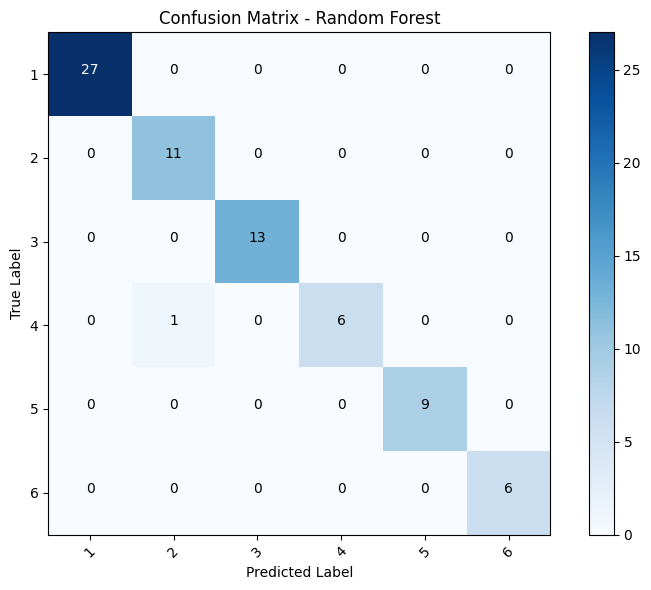

In [30]:
from sklearn.metrics import confusion_matrix
classes = ['1', '2', '3', '4', '5', '6']

confusion_matrices = {}

for name, clf in trained_models.items():
    y_pred = clf.predict(X_test_scaled)
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

for name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(bootstrap=True,random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on training data
y_pred_train = best_rf_model.predict(X_train_scaled)
y_pred_test = best_rf_model.predict(X_test_scaled)

# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='micro')
precision = precision_score(y_train, y_pred_train, average='micro')
recall = recall_score(y_train, y_pred_train, average='micro')
print("Training Accuracy:", accuracy)
print("Training F1 score:", f1)
print("Training precison:", precision)
print("Training recall:", recall)
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='micro')
precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
print("Test Accuracy:", accuracy)
print("Test F1 score:", f1)
print("Test precison:", precision)
print("Test recall:", recall)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9690824079485681
Training Accuracy: 1.0
Training Accuracy: 1.0
Training F1 score: 1.0
Training precison: 1.0
Training recall: 1.0
Test Accuracy: 0.9863013698630136
Test F1 score: 0.9863013698630136
Test precison: 0.9863013698630136
Test recall: 0.9863013698630136


In [30]:
# Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)
svm_classifier.fit(X_train_scaled, y_train)

y_pred_trainsvm = svm_classifier.predict(X_train_scaled)
y_pred_testsvm = svm_classifier.predict(X_test_scaled)

accuracy_train_svm = accuracy_score(y_train, y_pred_trainsvm)
classification_report_train= classification_report(y_train, y_pred_trainsvm)
accuracy_test_svm = accuracy_score(y_test, y_pred_testsvm)
classification_report_test = classification_report(y_test, y_pred_testsvm)

accuracy = accuracy_score(y_train, y_pred_trainsvm)
f1 = f1_score(y_train, y_pred_trainsvm, average='micro')
precision = precision_score(y_train, y_pred_trainsvm, average='micro')
recall = recall_score(y_train, y_pred_trainsvm, average='micro')
print("Training Accuracy:", accuracy)
print("Training F1 score:", f1)
print("Training precison:", precision)
print("Training recall:", recall)
accuracy = accuracy_score(y_test,y_pred_testsvm)
f1 = f1_score(y_test, y_pred_testsvm, average='micro')
precision = precision_score(y_test, y_pred_testsvm, average='micro')
recall = recall_score(y_test, y_pred_testsvm, average='micro')
print("Test Accuracy:", accuracy)
print("Test F1 score:", f1)
print("Test precison:", precision)
print("Test recall:", recall)

# Evaluate the model on the testing set
print(f"Train Accuracy: {accuracy_train_svm:.2f}")
print('Classification Report_train:\n', classification_report_train)
print(f"Test Accuracy: {accuracy_test_svm:.2f}")
print('Classification Report_test:\n', classification_report_test)

Training Accuracy: 1.0
Training F1 score: 1.0
Training precison: 1.0
Training recall: 1.0
Test Accuracy: 0.9863013698630136
Test F1 score: 0.9863013698630136
Test precison: 0.9863013698630136
Test recall: 0.9863013698630136
Train Accuracy: 1.00
Classification Report_train:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Test Accuracy: 0.99
Classification Report_test:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92 

## Voting Classifier

In [61]:
from sklearn.ensemble import VotingClassifier
random_state=42
ensemble_classifiers = [
    ('Logistic Regression', trained_models['Logistic Regression']),
    ('Logistic Ridge', trained_models['Logistic Ridge']),
    ('Logistic Lasso', trained_models['Logistic Lasso']),
    ('KNN', trained_models['KNN']),
    ('Multinomial Naive Bayes', trained_models['Multinomial Naive Bayes']),
    ('Best Random Forest', best_rf_model), 
    ('SVM', svm_classifier)
]

# Create a VotingClassifier with 'soft' voting (based on class probabilities)
voting_classifier = VotingClassifier(estimators=ensemble_classifiers, voting='soft')

# Fit the ensemble model on the training data
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train = voting_classifier.predict(X_train_scaled)

# Calculate accuracy on training data
accuracy_train_ensemble = accuracy_score(y_train, y_pred_train)
print("Ensemble Training Accuracy:", accuracy_train_ensemble)

# Make predictions on the test data
y_pred_test = voting_classifier.predict(X_test_scaled)

# Calculate accuracy on test data
accuracy_test_ensemble = accuracy_score(y_test, y_pred_test)
print("Ensemble Test Accuracy:", accuracy_test_ensemble)

Ensemble Training Accuracy: 0.9965753424657534
Ensemble Test Accuracy: 0.9863013698630136


In [62]:
# Evaluate the classifier
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='micro')
precision = precision_score(y_train, y_pred_train, average='micro')
recall = recall_score(y_train, y_pred_train, average='micro')
print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier f1 Score:", f1)
print("Voting Classifier Precision:", precision)
print("Voting Classifier Recall:", recall)

accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='micro')
precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier f1 Score:", f1)
print("Voting Classifier Precision:", precision)
print("Voting Classifier Recall:", recall)

Voting Classifier Accuracy: 0.9965753424657534
Voting Classifier f1 Score: 0.9965753424657534
Voting Classifier Precision: 0.9965753424657534
Voting Classifier Recall: 0.9965753424657534
Voting Classifier Accuracy: 0.9863013698630136
Voting Classifier f1 Score: 0.9863013698630136
Voting Classifier Precision: 0.9863013698630136
Voting Classifier Recall: 0.9863013698630136


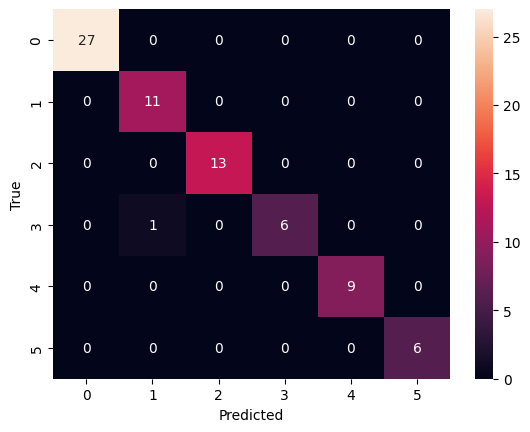

In [65]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

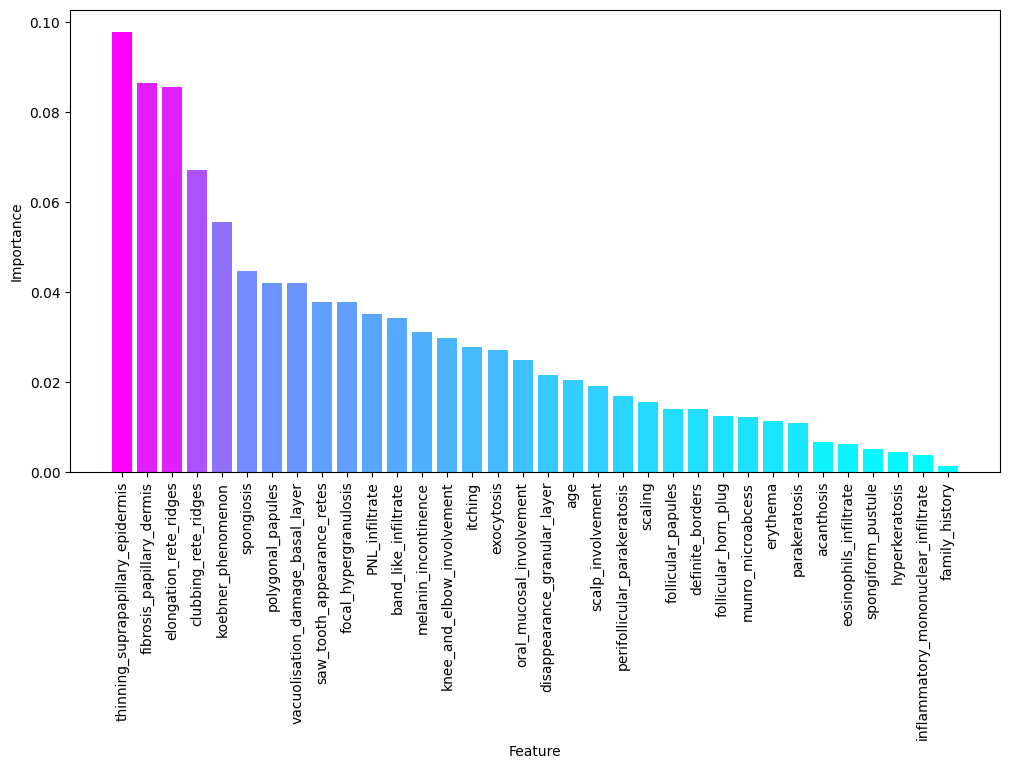

In [78]:
random_forest_classifier = voting_classifier.named_estimators_['Best Random Forest']

# Extract the feature importances
feature_importances_rf = random_forest_classifier.feature_importances_
feature_names = ['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate','age']

sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_feature_importances_rf = [feature_importances_rf[i] for i in sorted_indices_rf]
sorted_feature_names_rf = [feature_names[i] for i in sorted_indices_rf]

colormap = plt.cm.cool

normalized_importances = (sorted_feature_importances_rf - np.min(sorted_feature_importances_rf)) / (np.max(sorted_feature_importances_rf) - np.min(sorted_feature_importances_rf))

colors = colormap(normalized_importances)

# Create a bar plot with colored bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = plt.bar(range(len(sorted_feature_importances_rf)), sorted_feature_importances_rf, color=colors)
plt.xticks(range(len(sorted_feature_importances_rf)), sorted_feature_names_rf, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## SMOTE - NC

In [31]:
# Specify which features are categorical (nominal) using a boolean mask
categorical_features_mask = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,True, True, True, True, True, True, True, True, True, True, True,False]
len(categorical_features_mask)

34

In [32]:
from imblearn.over_sampling import SMOTENC

# Apply SMOTE-NC to balance the class distribution
smote_nc = SMOTENC(categorical_features=categorical_features_mask, random_state=42)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)


# Check the class distribution after applying SMOTE-NC
print("Class distribution after SMOTE-NC: Train")
print(y_train.value_counts())

Class distribution after SMOTE-NC: Train
1    85
2    85
3    85
4    85
5    85
6    85
Name: class, dtype: int64


In [34]:
X_train

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
0,2,2,2,3,1,2,0,2,0,0,...,2,2,2,1,3,0,0,2,3,28.000000
1,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,68.000000
2,1,1,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,35.000000
3,3,2,1,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,25.000000
4,1,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,55.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2,2,0,0,0,0,2,0,1,0,...,0,0,0,0,0,1,2,1,0,12.337615
506,2,1,1,0,0,0,2,0,1,0,...,0,0,0,0,0,1,2,1,0,10.000000
507,2,2,0,1,0,0,2,0,1,0,...,0,0,0,1,0,1,2,1,0,8.646406
508,2,2,1,0,0,0,2,0,2,0,...,0,0,0,3,0,1,2,1,0,8.962419


In [35]:
X_train.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [36]:
X_test

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
194,3,2,2,0,0,0,0,0,3,3,...,0,3,0,0,0,0,0,2,0,35.000000
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,35.748252
15,1,1,0,1,3,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,40.000000
310,3,2,2,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,2,0,50.000000
57,2,1,1,3,0,3,0,1,0,0,...,1,0,3,0,1,0,0,2,2,29.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,1,40.000000
82,2,1,1,2,0,0,0,0,0,0,...,0,0,0,3,0,0,0,3,0,27.000000
94,2,1,1,3,2,2,0,2,0,0,...,2,0,3,0,2,0,0,3,3,22.000000
193,2,2,2,0,0,0,0,0,2,2,...,0,2,0,0,0,0,0,2,0,18.000000


In [37]:
X_test.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled['age'] = scaler.fit_transform(X_train_scaled[['age']])

In [34]:
X_test_scaled.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

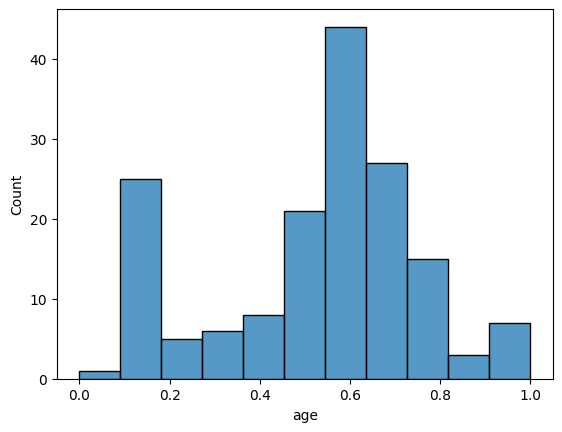

In [37]:
sns.histplot(data=X_test_scaled,x='age')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import joblib

random_state = 42
classifiers = [
    ('Logistic Regression(SMOTE)', LogisticRegression(max_iter=1000)),
    ('Logistic Ridge(SMOTE)', LogisticRegression(penalty='l2', max_iter=1000)),
    ('Logistic Lasso(SMOTE)', LogisticRegression(penalty='l1',solver='liblinear')),
    ('KNN(SMOTE)', KNeighborsClassifier()),
    ('Multinomial Naive Bayes(SMOTE)', MultinomialNB()),
    ('Random Forest(SMOTE)', RandomForestClassifier())
]

# Dictionary to store the results
results = {}
classification_reports = {}
smote_trained_models = {}
# Iterate over classifiers and calculate metrics
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    smote_trained_models[name] = clf 
    y_pred = clf.predict(X_train_scaled)
    classification_report_text = classification_report(y_train, y_pred)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='macro')
    precision = precision_score(y_train, y_pred, average='macro')
    recall = recall_score(y_train, y_pred, average='macro')
    
    classification_reports[name] = classification_report_text
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

for name, report in classification_reports.items():
    print(f"Classification Report for {name}:\n{report}")
    
for name, model in smote_trained_models.items():
    filename = f"{name}_model.joblib"
    joblib.dump(model, filename)

           Logistic Regression(SMOTE)  Logistic Ridge(SMOTE)  \
Accuracy                     0.998039               0.998039   
F1-Score                     0.998039               0.998039   
Precision                    0.998062               0.998062   
Recall                       0.998039               0.998039   

           Logistic Lasso(SMOTE)  KNN(SMOTE)  Multinomial Naive Bayes(SMOTE)  \
Accuracy                0.994118    0.992157                        0.990196   
F1-Score                0.994117    0.992156                        0.990196   
Precision               0.994140    0.992245                        0.990218   
Recall                  0.994118    0.992157                        0.990196   

           Random Forest(SMOTE)  
Accuracy                    1.0  
F1-Score                    1.0  
Precision                   1.0  
Recall                      1.0  
Classification Report for Logistic Regression(SMOTE):
              precision    recall  f1-score   support


In [36]:
results = {}

for name, clf in smote_trained_models.items():
    y_pred = clf.predict(X_test_scaled) 
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

results_df = pd.DataFrame(results)
print(results_df)

           Logistic Regression(SMOTE)  Logistic Ridge(SMOTE)  \
Accuracy                     0.986301               0.986301   
F1-Score                     0.979933               0.979933   
Precision                    0.986111               0.986111   
Recall                       0.976190               0.976190   

           Logistic Lasso(SMOTE)  KNN(SMOTE)  Multinomial Naive Bayes(SMOTE)  \
Accuracy                0.986301    0.972603                        0.986301   
F1-Score                0.979933    0.961039                        0.980952   
Precision               0.986111    0.961039                        0.979167   
Recall                  0.976190    0.961039                        0.984848   

           Random Forest(SMOTE)  
Accuracy               0.986301  
F1-Score               0.979933  
Precision              0.986111  
Recall                 0.976190  


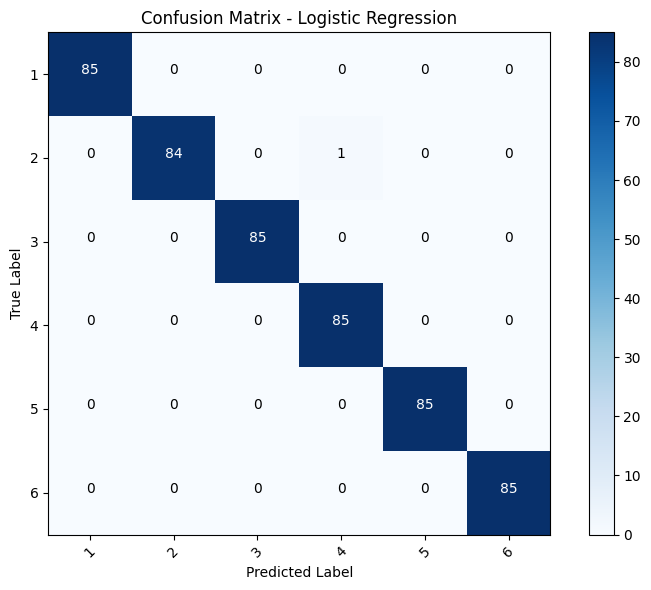

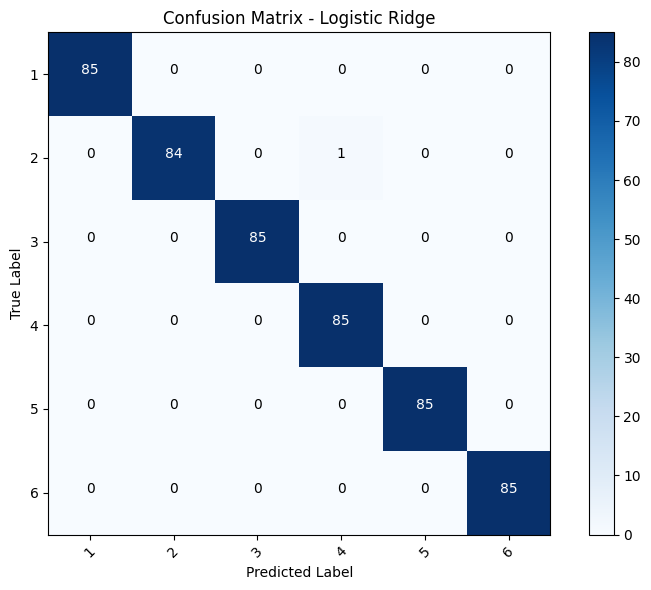

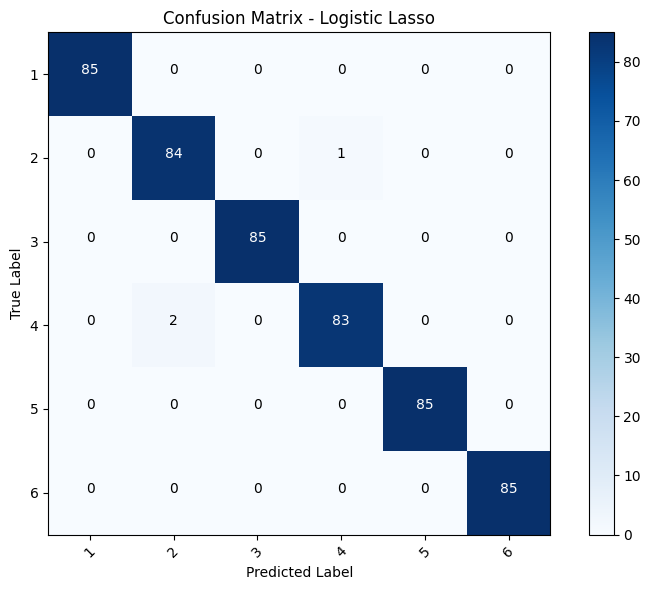

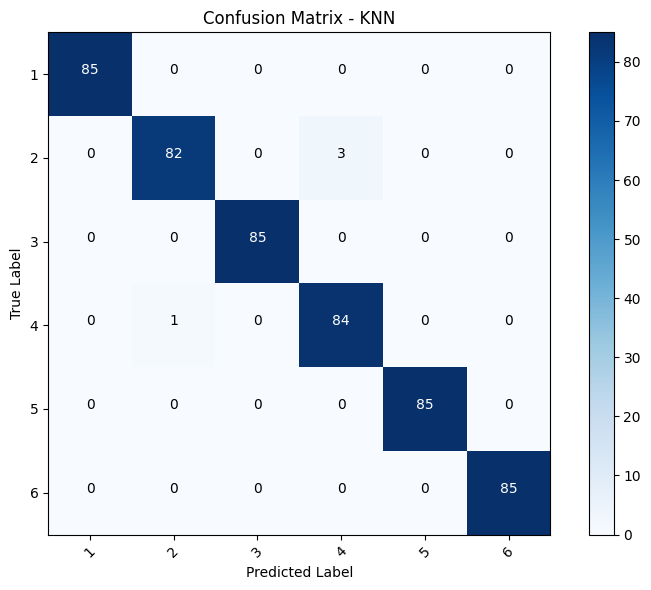

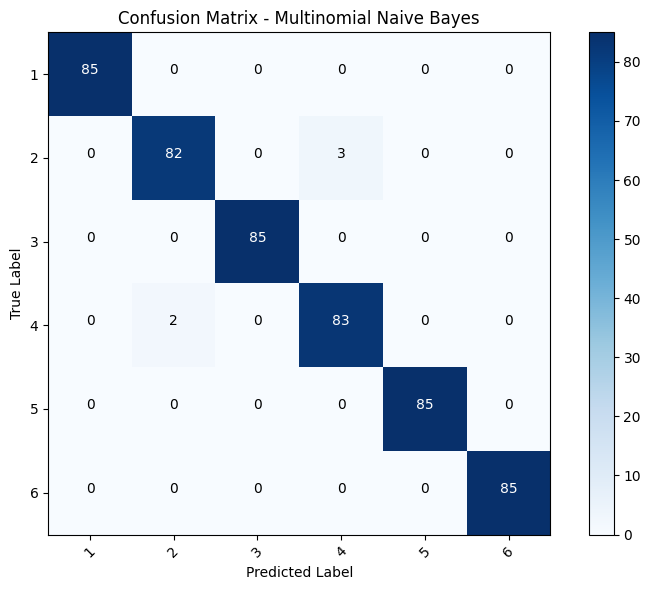

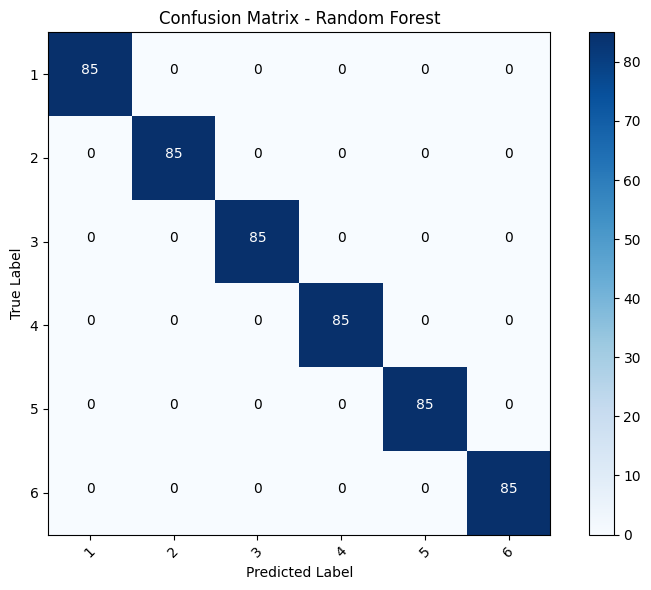

In [40]:
from sklearn.metrics import confusion_matrix
classes = ['1', '2', '3', '4', '5', '6']

confusion_matrices = {}

for name, clf in smote_trained_models.items():
    y_pred = clf.predict(X_train_scaled)
    
    cm = confusion_matrix(y_train, y_pred)
    confusion_matrices[name] = cm

for name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

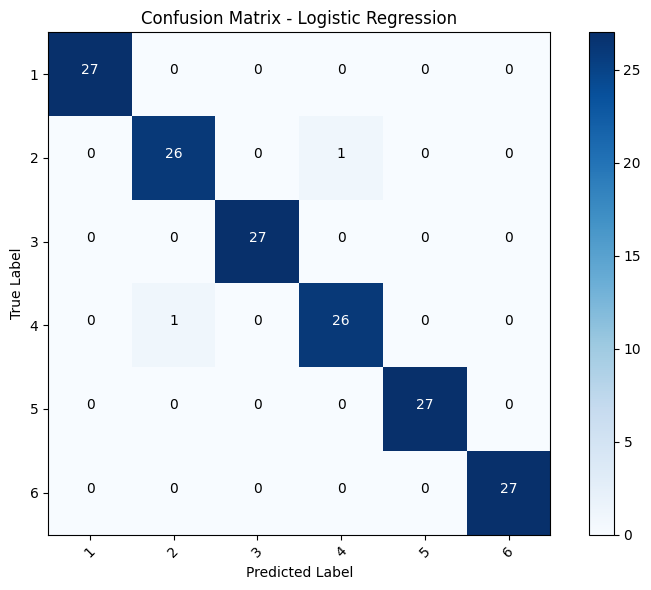

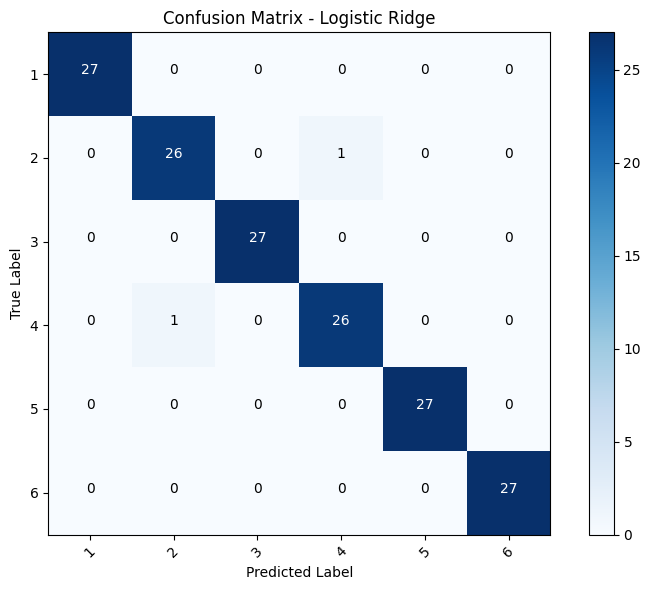

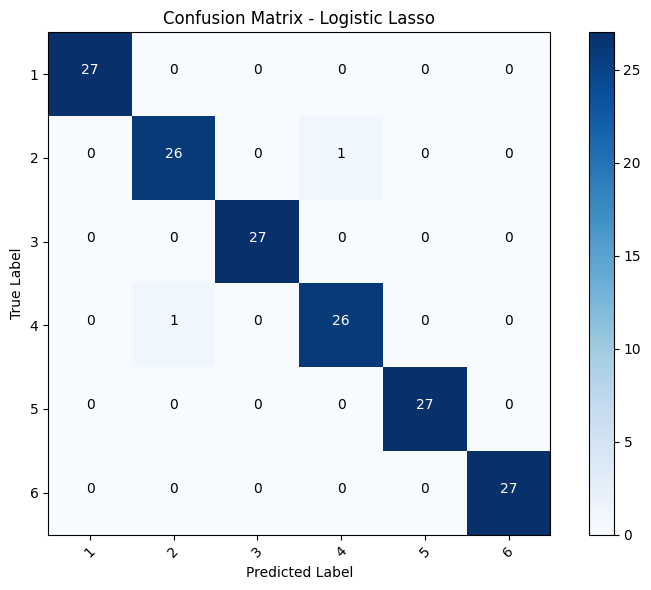

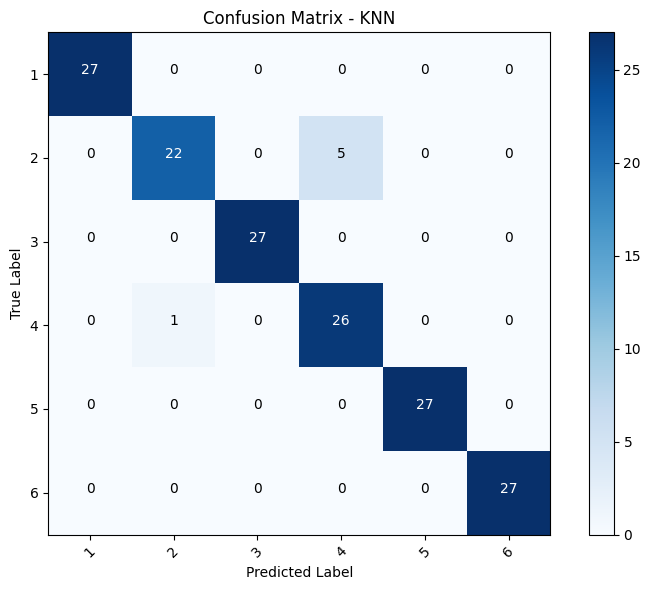

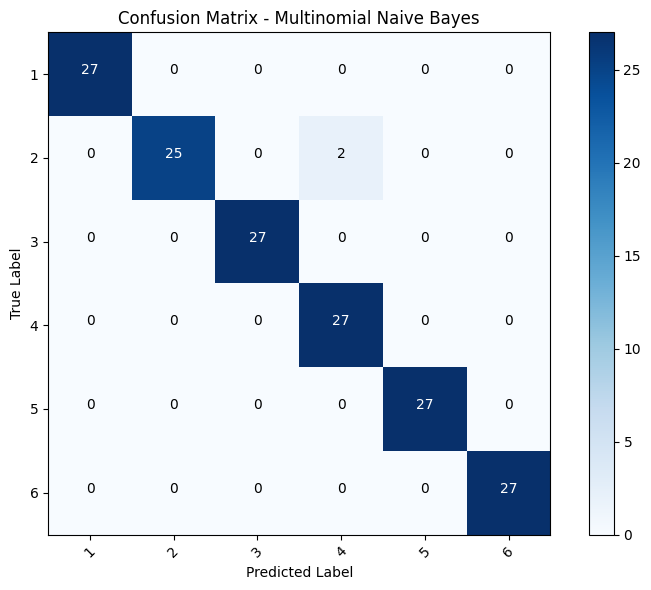

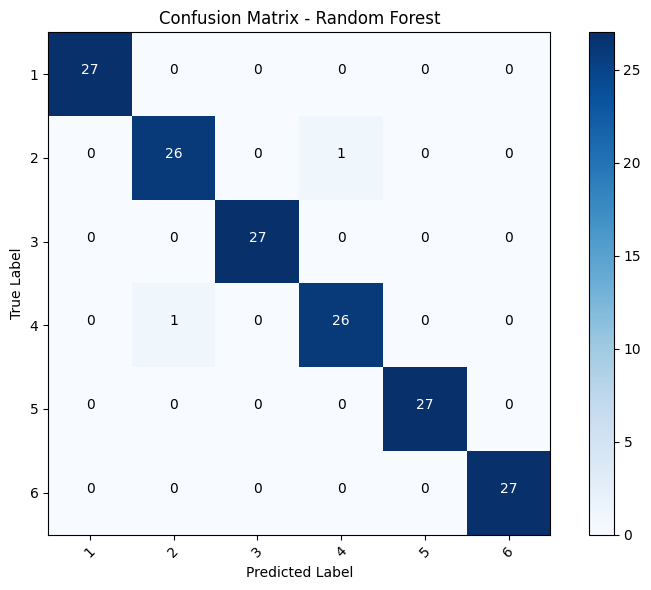

In [41]:
from sklearn.metrics import confusion_matrix
classes = ['1', '2', '3', '4', '5', '6']

confusion_matrices = {}

for name, clf in smote_trained_models.items():
    y_pred = clf.predict(X_test_scaled)
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

for name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(bootstrap=True,random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_model_smote = grid_search.best_estimator_

# Make predictions on training data
y_pred_train = best_rf_model_smote.predict(X_train_scaled)
y_pred_test = best_rf_model_smote.predict(X_test_scaled)

# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_pred_train)

accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='macro')
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
print("Training Accuracy:", accuracy)
print("Training F1 score:", f1)
print("Training precison:", precision)
print("Training recall:", recall)
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='macro')
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
print("Test Accuracy:", accuracy)
print("Test F1 score:", f1)
print("Test precison:", precision)
print("Test recall:", recall)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9862745098039216
Training Accuracy: 0.996078431372549
Training F1 score: 0.996078431372549
Training precison: 0.996078431372549
Training recall: 0.996078431372549
Test Accuracy: 0.9863013698630136
Test F1 score: 0.9799331103678929
Test precison: 0.986111111111111
Test recall: 0.9761904761904763


In [38]:
# Support Vector Machine Classifier
svm_classifier_smote = SVC(kernel='linear', C=1.0, probability=True)
svm_classifier_smote.fit(X_train_scaled, y_train)

y_pred_trainsvm = svm_classifier_smote.predict(X_train_scaled)
y_pred_testsvm = svm_classifier_smote.predict(X_test_scaled)

accuracy_train_svm = accuracy_score(y_train, y_pred_trainsvm)
classification_report_train= classification_report(y_train, y_pred_trainsvm)
accuracy_test_svm = accuracy_score(y_test, y_pred_testsvm)
classification_report_test = classification_report(y_test, y_pred_testsvm)

accuracy = accuracy_score(y_train, y_pred_trainsvm)
f1 = f1_score(y_train, y_pred_trainsvm, average='macro')
precision = precision_score(y_train, y_pred_trainsvm, average='macro')
recall = recall_score(y_train, y_pred_trainsvm, average='macro')
print("Training Accuracy:", accuracy)
print("Training F1 score:", f1)
print("Training precison:", precision)
print("Training recall:", recall)
accuracy = accuracy_score(y_test,y_pred_testsvm)
f1 = f1_score(y_test, y_pred_testsvm, average='macro')
precision = precision_score(y_test, y_pred_testsvm, average='macro')
recall = recall_score(y_test, y_pred_testsvm, average='macro')
print("Test Accuracy:", accuracy)
print("Test F1 score:", f1)
print("Test precison:", precision)
print("Test recall:", recall)

# Evaluate the model on the testing set
print(f"Train Accuracy: {accuracy_train_svm:.2f}")
print('Classification Report_train:\n', classification_report_train)
print(f"Test Accuracy: {accuracy_test_svm:.2f}")
print('Classification Report_test:\n', classification_report_test)

Training Accuracy: 1.0
Training F1 score: 1.0
Training precison: 1.0
Training recall: 1.0
Test Accuracy: 0.9863013698630136
Test F1 score: 0.9799331103678929
Test precison: 0.986111111111111
Test recall: 0.9761904761904763
Train Accuracy: 1.00
Classification Report_train:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

Test Accuracy: 0.99
Classification Report_test:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92  

In [39]:
from sklearn.ensemble import VotingClassifier
random_state=42
ensemble_classifiers = [
    ('Logistic Regression', smote_trained_models['Logistic Regression(SMOTE)']),
    ('Logistic Ridge', smote_trained_models['Logistic Ridge(SMOTE)']),
    ('Logistic Lasso', smote_trained_models['Logistic Lasso(SMOTE)']),
    ('KNN', smote_trained_models['KNN(SMOTE)']),
    ('Multinomial Naive Bayes', smote_trained_models['Multinomial Naive Bayes(SMOTE)']),
    ('Best Random Forest', best_rf_model_smote), 
    ('SVM', svm_classifier_smote)
]

# Create a VotingClassifier with 'soft' voting (based on class probabilities)
voting_classifier = VotingClassifier(estimators=ensemble_classifiers, voting='hard')

# Fit the ensemble model on the training data
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train = voting_classifier.predict(X_train_scaled)

# Calculate accuracy on training data
accuracy_train_ensemble = accuracy_score(y_train, y_pred_train)
print("Ensemble Training Accuracy:", accuracy_train_ensemble)

# Make predictions on the test data
y_pred_test = voting_classifier.predict(X_test_scaled)

# Calculate accuracy on test data
accuracy_test_ensemble = accuracy_score(y_test, y_pred_test)
print("Ensemble Test Accuracy:", accuracy_test_ensemble)

Ensemble Training Accuracy: 0.9980392156862745
Ensemble Test Accuracy: 0.9863013698630136


In [40]:
# Evaluate the classifier
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='macro')
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier f1 Score:", f1)
print("Voting Classifier Precision:", precision)
print("Voting Classifier Recall:", recall)

accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='macro')
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier f1 Score:", f1)
print("Voting Classifier Precision:", precision)
print("Voting Classifier Recall:", recall)

Voting Classifier Accuracy: 0.9980392156862745
Voting Classifier f1 Score: 0.9980391478367187
Voting Classifier Precision: 0.998062015503876
Voting Classifier Recall: 0.9980392156862745
Voting Classifier Accuracy: 0.9863013698630136
Voting Classifier f1 Score: 0.9799331103678929
Voting Classifier Precision: 0.986111111111111
Voting Classifier Recall: 0.9761904761904763


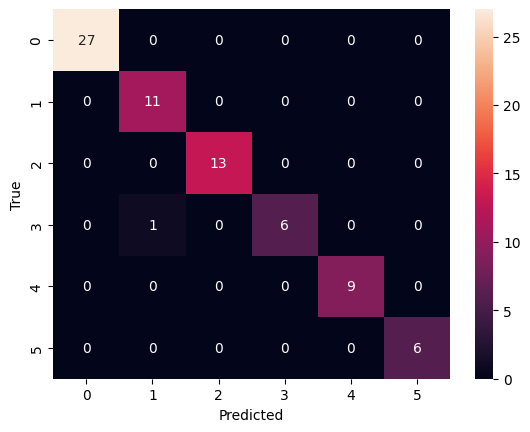

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

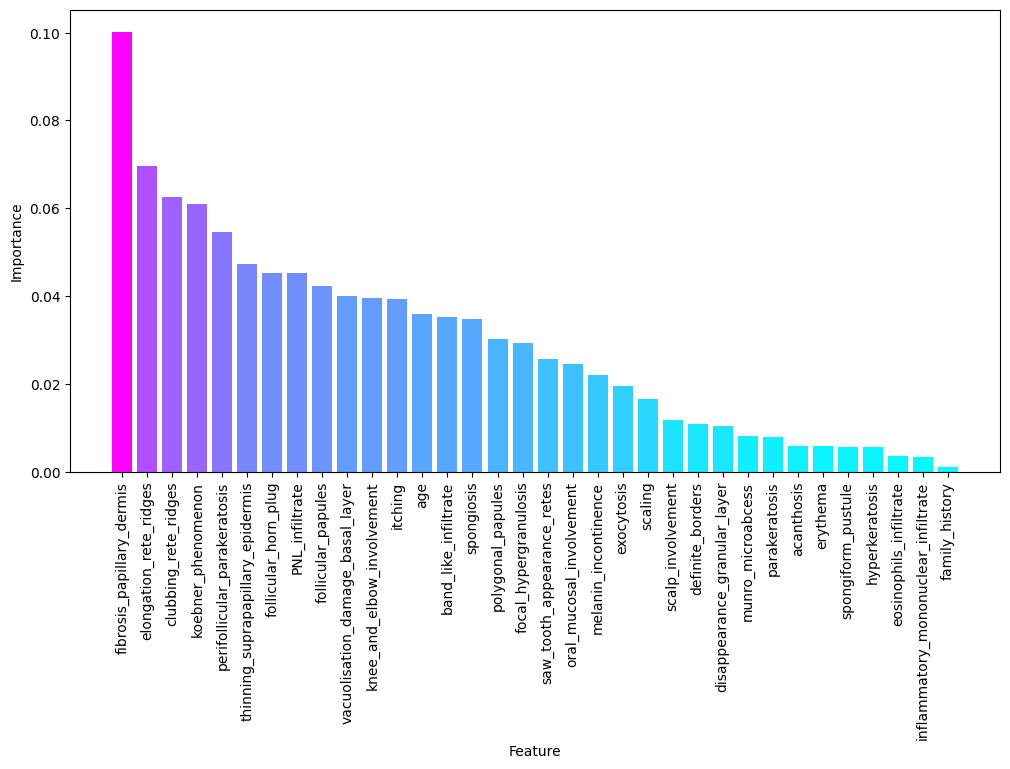

In [43]:
random_forest_classifier = voting_classifier.named_estimators_['Best Random Forest']

# Extract the feature importances
feature_importances_rf = random_forest_classifier.feature_importances_
feature_names = ['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate','age']

sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_feature_importances_rf = [feature_importances_rf[i] for i in sorted_indices_rf]
sorted_feature_names_rf = [feature_names[i] for i in sorted_indices_rf]

colormap = plt.cm.cool

normalized_importances = (sorted_feature_importances_rf - np.min(sorted_feature_importances_rf)) / (np.max(sorted_feature_importances_rf) - np.min(sorted_feature_importances_rf))

colors = colormap(normalized_importances)

# Create a bar plot with colored bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = plt.bar(range(len(sorted_feature_importances_rf)), sorted_feature_importances_rf, color=colors)
plt.xticks(range(len(sorted_feature_importances_rf)), sorted_feature_names_rf, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [117]:
sorted_feature_names_rf 

['fibrosis_papillary_dermis',
 'elongation_rete_ridges',
 'clubbing_rete_ridges',
 'koebner_phenomenon',
 'perifollicular_parakeratosis',
 'thinning_suprapapillary_epidermis',
 'follicular_horn_plug',
 'PNL_infiltrate',
 'follicular_papules',
 'vacuolisation_damage_basal_layer',
 'knee_and_elbow_involvement',
 'itching',
 'age',
 'band_like_infiltrate',
 'spongiosis',
 'polygonal_papules',
 'focal_hypergranulosis',
 'saw_tooth_appearance_retes',
 'oral_mucosal_involvement',
 'melanin_incontinence',
 'exocytosis',
 'scaling',
 'scalp_involvement',
 'definite_borders',
 'disappearance_granular_layer',
 'munro_microabcess',
 'parakeratosis',
 'acanthosis',
 'erythema',
 'spongiform_pustule',
 'hyperkeratosis',
 'eosinophils_infiltrate',
 'inflammatory_mononuclear_infiltrate',
 'family_history']

# Reduced Model

In [44]:
#Extracting important variables
imp_columns = ['fibrosis_papillary_dermis',
 'elongation_rete_ridges',
 'clubbing_rete_ridges',
 'koebner_phenomenon',
 'perifollicular_parakeratosis',
 'thinning_suprapapillary_epidermis',
 'follicular_horn_plug',
 'PNL_infiltrate',
 'follicular_papules',
 'vacuolisation_damage_basal_layer',
 'knee_and_elbow_involvement',
 'itching',
 'age']
X_train_scaled_reduced = X_train_scaled[imp_columns]
X_test_scaled_reduced = X_test_scaled[imp_columns]

In [45]:
X_train_scaled_reduced.head()

,fibrosis_papillary_dermis,elongation_rete_ridges,clubbing_rete_ridges,koebner_phenomenon,perifollicular_parakeratosis,thinning_suprapapillary_epidermis,follicular_horn_plug,PNL_infiltrate,follicular_papules,vacuolisation_damage_basal_layer,knee_and_elbow_involvement,itching,age
0,0,0,0,1,0,0,0,0,0,2,0,3,0.308824
1,3,3,0,0,0,0,0,0,0,0,0,2,0.897059
2,2,1,0,0,0,0,0,0,2,0,0,1,0.411765
3,0,0,0,0,0,0,0,2,0,0,0,2,0.264706
4,3,0,0,0,0,0,0,0,0,0,0,3,0.705882


In [46]:
# Dictionary to store the results
classifiers = [
    ('Logistic Regression(Reduced)', LogisticRegression(max_iter=1000)),
    ('Logistic Ridge(Reduced)', LogisticRegression(penalty='l2', max_iter=1000)),
    ('Logistic Lasso(Reduced)', LogisticRegression(penalty='l1',solver='liblinear')),
    ('KNN(Reduced)', KNeighborsClassifier()),
    ('Multinomial Naive Bayes(Reduced)', MultinomialNB()),
    ('Random Forest(Reduced)', RandomForestClassifier())
]
results = {}
classification_reports = {}
reduced_trained_models = {}
# Iterate over classifiers and calculate metrics
random_state=42
for name, clf in classifiers:
    clf.fit(X_train_scaled_reduced, y_train)
    reduced_trained_models[name] = clf 
    y_pred_red = clf.predict(X_train_scaled_reduced)
    classification_report_text = classification_report(y_train, y_pred_red)
    accuracy = accuracy_score(y_train, y_pred_red)
    f1 = f1_score(y_train, y_pred_red, average='macro')
    precision = precision_score(y_train, y_pred_red, average='macro')
    recall = recall_score(y_train, y_pred_red, average='macro')
    
    classification_reports[name] = classification_report_text
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

for name, report in classification_reports.items():
    print(f"Classification Report for {name}:\n{report}")
    
for name, model in reduced_trained_models.items():
    filename = f"{name}_model.joblib"
    joblib.dump(model, filename)

           Logistic Regression(Reduced)  Logistic Ridge(Reduced)  \
Accuracy                       0.988235                 0.988235   
F1-Score                       0.988234                 0.988234   
Precision                      0.988321                 0.988321   
Recall                         0.988235                 0.988235   

           Logistic Lasso(Reduced)  KNN(Reduced)  \
Accuracy                  0.986275      0.984314   
F1-Score                  0.986297      0.984314   
Precision                 0.986385      0.984337   
Recall                    0.986275      0.984314   

           Multinomial Naive Bayes(Reduced)  Random Forest(Reduced)  
Accuracy                           0.972549                0.998039  
F1-Score                           0.972201                0.998039  
Precision                          0.972459                0.998062  
Recall                             0.972549                0.998039  
Classification Report for Logistic Regression(Re

In [47]:
results = {}

for name, clf in reduced_trained_models.items():
    y_pred_red = clf.predict(X_test_scaled_reduced) 
    
    accuracy = accuracy_score(y_test, y_pred_red)
    f1 = f1_score(y_test, y_pred_red, average='macro')
    precision = precision_score(y_test, y_pred_red, average='macro')
    recall = recall_score(y_test, y_pred_red, average='macro')
    
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall}

results_df = pd.DataFrame(results)
print(results_df)

           Logistic Regression(Reduced)  Logistic Ridge(Reduced)  \
Accuracy                       0.972603                 0.972603   
F1-Score                       0.963487                 0.963487   
Precision                      0.974359                 0.974359   
Recall                         0.957672                 0.957672   

           Logistic Lasso(Reduced)  KNN(Reduced)  \
Accuracy                  0.986301      0.931507   
F1-Score                  0.979933      0.909524   
Precision                 0.986111      0.928571   
Recall                    0.976190      0.905483   

           Multinomial Naive Bayes(Reduced)  Random Forest(Reduced)  
Accuracy                           0.972603                0.986301  
F1-Score                           0.963256                0.979933  
Precision                          0.968182                0.986111  
Recall                             0.961039                0.976190  


Reduced Fandom Forest with SMOTE

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(bootstrap=True,random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train_scaled_reduced, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_model_reduced = grid_search.best_estimator_

# Make predictions on training data
y_pred_train = best_rf_model_reduced .predict(X_train_scaled_reduced)
y_pred_test = best_rf_model_reduced .predict(X_test_scaled_reduced)

accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='macro')
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
print("Training Accuracy:", accuracy)
print("Training F1 score:", f1)
print("Training precison:", precision)
print("Training recall:", recall)
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='macro')
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
print("Test Accuracy:", accuracy)
print("Test F1 score:", f1)
print("Test precison:", precision)
print("Test recall:", recall)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9823529411764707
Training Accuracy: 0.984313725490196
Training F1 score: 0.984289495929172
Training precison: 0.9843560287662276
Training recall: 0.9843137254901961
Test Accuracy: 0.9863013698630136
Test F1 score: 0.9799331103678929
Test precison: 0.986111111111111
Test recall: 0.9761904761904763


Reduced SVM with SMOTE

In [49]:
# Support Vector Machine Classifier
svm_classifier_reduced  = SVC(kernel='linear', C=1.0, probability=True)
svm_classifier_reduced .fit(X_train_scaled_reduced, y_train)

y_pred_trainsvm = svm_classifier_reduced .predict(X_train_scaled_reduced)
y_pred_testsvm = svm_classifier_reduced .predict(X_test_scaled_reduced)

accuracy = accuracy_score(y_train, y_pred_trainsvm)
f1 = f1_score(y_train, y_pred_trainsvm, average='macro')
precision = precision_score(y_train, y_pred_trainsvm, average='macro')
recall = recall_score(y_train, y_pred_trainsvm, average='macro')
print("Training Accuracy:", accuracy)
print("Training F1 score:", f1)
print("Training precison:", precision)
print("Training recall:", recall)
accuracy = accuracy_score(y_test,y_pred_testsvm)
f1 = f1_score(y_test, y_pred_testsvm, average='macro')
precision = precision_score(y_test, y_pred_testsvm, average='macro')
recall = recall_score(y_test, y_pred_testsvm, average='macro')
print("Test Accuracy:", accuracy)
print("Test F1 score:", f1)
print("Test precison:", precision)
print("Test recall:", recall)
# Evaluate the model on the testing set
print(f"Train Accuracy: {accuracy_train_svm:.2f}")
print('Classification Report_train:\n', classification_report_train)
print(f"Test Accuracy: {accuracy_test_svm:.2f}")
print('Classification Report_test:\n', classification_report_test)

Training Accuracy: 0.9862745098039216
Training F1 score: 0.9862503480924533
Training precison: 0.9862940132623518
Training recall: 0.9862745098039216
Test Accuracy: 0.9863013698630136
Test F1 score: 0.9799331103678929
Test precison: 0.986111111111111
Test recall: 0.9761904761904763
Train Accuracy: 1.00
Classification Report_train:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

Test Accuracy: 0.99
Classification Report_test:
               precision    recall  f1-score   support

           1       

Voting Classifier Reduced Model

In [50]:
from sklearn.ensemble import VotingClassifier
random_state=42
ensemble_classifiers = [
    ('Logistic Regression', reduced_trained_models['Logistic Regression(Reduced)']),
    ('Logistic Ridge', reduced_trained_models['Logistic Ridge(Reduced)']),
    ('Logistic Lasso', reduced_trained_models['Logistic Lasso(Reduced)']),
    ('KNN', reduced_trained_models['KNN(Reduced)']),
    ('Multinomial Naive Bayes', reduced_trained_models['Multinomial Naive Bayes(Reduced)']),
    ('Best Random Forest', best_rf_model_reduced ), 
    ('SVM', svm_classifier_reduced )
]

# Create a VotingClassifier with 'soft' voting (based on class probabilities)
voting_classifier = VotingClassifier(estimators=ensemble_classifiers, voting='hard')

# Fit the ensemble model on the training data
voting_classifier.fit(X_train_scaled_reduced, y_train)

# Make predictions on the training data
y_pred_train = voting_classifier.predict(X_train_scaled_reduced)

# Calculate accuracy on training data
accuracy_train_ensemble = accuracy_score(y_train, y_pred_train)
print("Ensemble Training Accuracy:", accuracy_train_ensemble)

# Make predictions on the test data
y_pred_test = voting_classifier.predict(X_test_scaled_reduced)

# Calculate accuracy on test data
accuracy_test_ensemble = accuracy_score(y_test, y_pred_test)
print("Ensemble Test Accuracy:", accuracy_test_ensemble)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='macro')
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier f1 Score:", f1)
print("Voting Classifier Precision:", precision)
print("Voting Classifier Recall:", recall)

accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='macro')
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier f1 Score:", f1)
print("Voting Classifier Precision:", precision)
print("Voting Classifier Recall:", recall)



Ensemble Training Accuracy: 0.9862745098039216
Ensemble Test Accuracy: 0.9863013698630136
Voting Classifier Accuracy: 0.9862745098039216
Voting Classifier f1 Score: 0.9862503480924533
Voting Classifier Precision: 0.9862940132623518
Voting Classifier Recall: 0.9862745098039216
Voting Classifier Accuracy: 0.9863013698630136
Voting Classifier f1 Score: 0.9799331103678929
Voting Classifier Precision: 0.986111111111111
Voting Classifier Recall: 0.9761904761904763


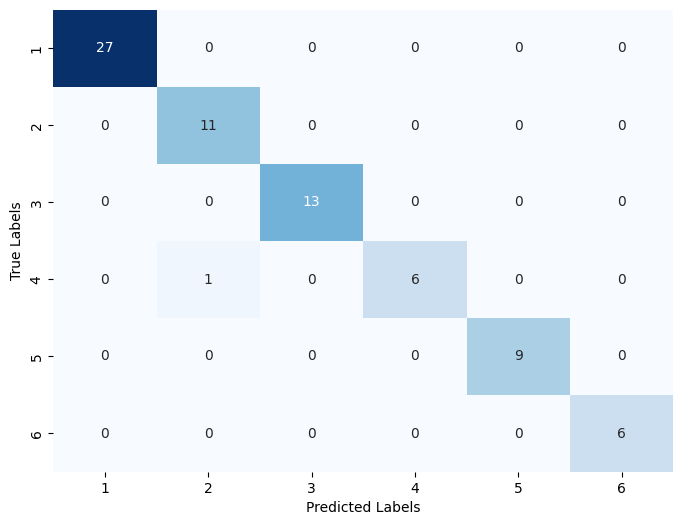

In [56]:
confusion_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

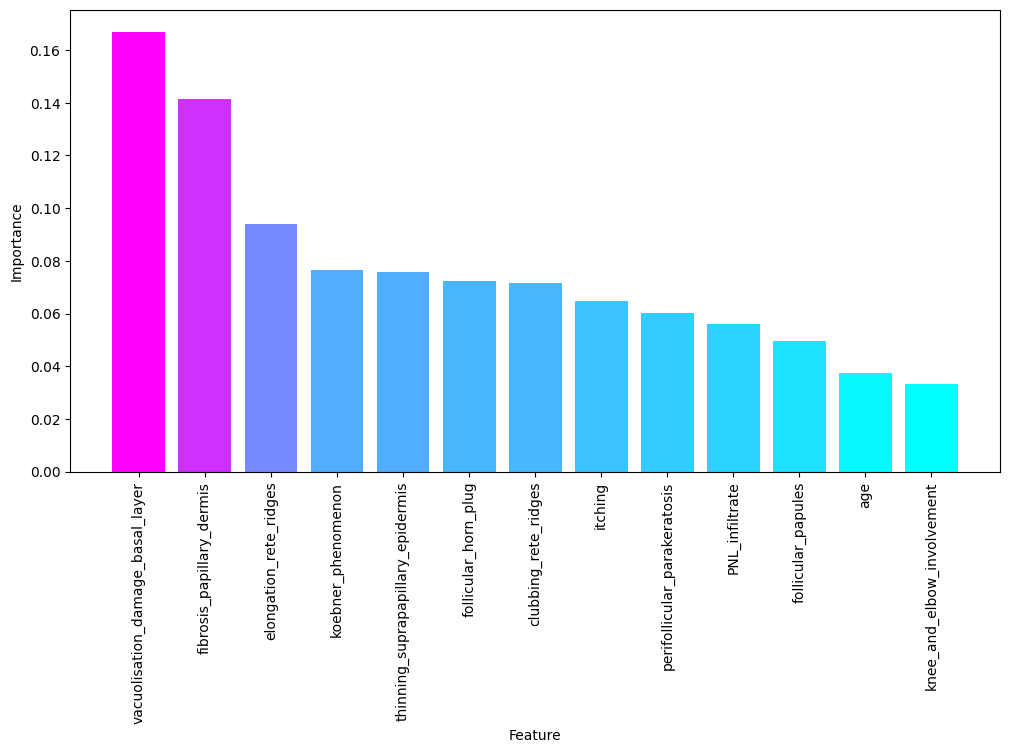

In [52]:
random_forest_classifier = voting_classifier.named_estimators_['Best Random Forest']

# Extract the feature importances
feature_importances_rf = random_forest_classifier.feature_importances_
feature_names = ['fibrosis_papillary_dermis',
 'elongation_rete_ridges',
 'clubbing_rete_ridges',
 'koebner_phenomenon',
 'perifollicular_parakeratosis',
 'thinning_suprapapillary_epidermis',
 'follicular_horn_plug',
 'PNL_infiltrate',
 'follicular_papules',
 'vacuolisation_damage_basal_layer',
 'knee_and_elbow_involvement',
 'itching',
 'age']

sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_feature_importances_rf = [feature_importances_rf[i] for i in sorted_indices_rf]
sorted_feature_names_rf = [feature_names[i] for i in sorted_indices_rf]

colormap = plt.cm.cool

normalized_importances = (sorted_feature_importances_rf - np.min(sorted_feature_importances_rf)) / (np.max(sorted_feature_importances_rf) - np.min(sorted_feature_importances_rf))

colors = colormap(normalized_importances)

# Create a bar plot with colored bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = plt.bar(range(len(sorted_feature_importances_rf)), sorted_feature_importances_rf, color=colors)
plt.xticks(range(len(sorted_feature_importances_rf)), sorted_feature_names_rf, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()